### Importing the necessary libraries for Exploration

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
df = pd.read_csv("Loan_default.csv")

df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [5]:
df.shape

(255347, 18)

In [6]:
#Copying the dataset to loan_data variable so as to keep the original dataset in df
loan_data = df.copy()


### Step 1. Understanding & Exploring the Dataset:

In [7]:
loan_data.head(10)

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
5,A9S62RQ7US,25,90298,90448,720,18,2,22.72,24,0.10,High School,Unemployed,Single,Yes,No,Business,Yes,1
6,H8GXPAOS71,38,111188,177025,429,80,1,19.11,12,0.16,Bachelor's,Unemployed,Single,Yes,No,Home,Yes,0
7,0HGZQKJ36W,56,126802,155511,531,67,4,8.15,60,0.43,PhD,Full-time,Married,No,No,Home,Yes,0
8,1R0N3LGNRJ,36,42053,92357,827,83,1,23.94,48,0.20,Bachelor's,Self-employed,Divorced,Yes,No,Education,No,1
9,CM9L1GTT2P,40,132784,228510,480,114,4,9.09,48,0.33,High School,Self-employed,Married,Yes,No,Other,Yes,0


In [8]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [9]:
# Verifying if there are missing elements in each column
loan_data.isna().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [10]:
loan_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,255347.0,43.498306,14.990258,18.0,31.00,43.00,56.00,69.0
Income,255347.0,82499.304597,38963.013729,15000.0,48825.50,82466.00,116219.00,149999.0
LoanAmount,255347.0,127578.865512,70840.706142,5000.0,66156.00,127556.00,188985.00,249999.0
CreditScore,255347.0,574.264346,158.903867,300.0,437.00,574.00,712.00,849.0
MonthsEmployed,255347.0,59.541976,34.643376,0.0,30.00,60.00,90.00,119.0
NumCreditLines,255347.0,2.501036,1.117018,1.0,2.00,2.00,3.00,4.0
InterestRate,255347.0,13.492773,6.636443,2.0,7.77,13.46,19.25,25.0
LoanTerm,255347.0,36.025894,16.969330,12.0,24.00,36.00,48.00,60.0
DTIRatio,255347.0,0.500212,0.230917,0.1,0.30,0.50,0.70,0.9
Default,255347.0,0.116128,0.320379,0.0,0.00,0.00,0.00,1.0


In [11]:
# Previewing each column so as to understand the kind of data it entails and how to handle the data:
#len(loan_data['DTIRatio'].unique())
#loan_data['MaritalStatus'].unique()
loan_data['Default'].value_counts()

Default
0    225694
1     29653
Name: count, dtype: int64

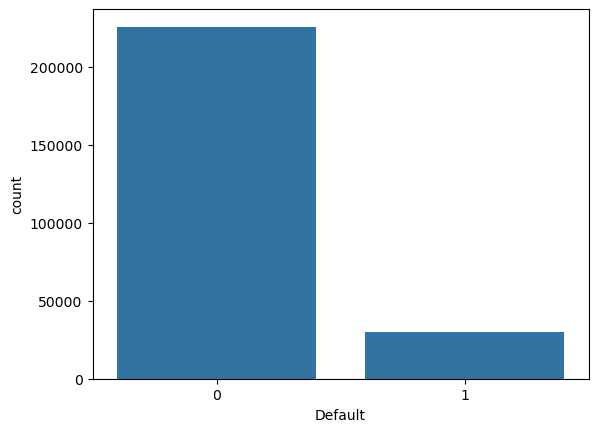

In [12]:
sns.countplot(x=loan_data['Default'], data=loan_data)
plt.show()

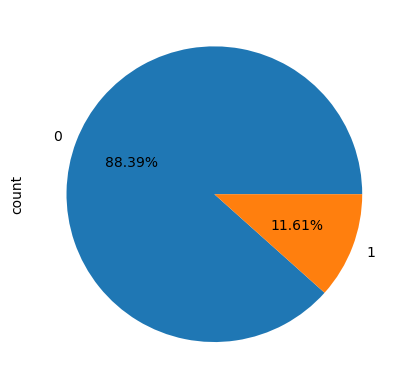

In [13]:
loan_data['Default'].value_counts().plot.pie(autopct="%.2f%%")
plt.show()

### Data Overview:

1. The data set consist of 18 columns and 255,347 rows.
2. 10 of the columns are either of Integer Data Type or Float.
3. The remain 8 columns is of String/Object Data Type where 7 of the columns are Categorical Variables.
4. The target (dependent) variable is the 'Default' column, with categorical variable 0 for Non-Defaulters & 1 for Defaulters.
5. There are no missing data in the dataset.
6. After previewing each column, LoadID column will be dropped as it has no importance in determining the target variable.
7. The average values for Age, Income, LoanAmount, CreditScore, MonthsEmployed and LoanTerm are 43years, #82,500, #127,500, 574.3, 60months and 36months respectively.
8. The Target variable (Default) showed a great level of imbalance as the ratio of Non-Defaulters to Defaulters is about 8 to 1. Handling this data imbalance is key to the model performance.
9. Overall, there is even distribution for almost all the value in the dataset.

In [14]:
# Dropping the LoanID column,
loan_data.drop('LoanID', axis=1, inplace=True)

### Step 2. Visualizing The Data:

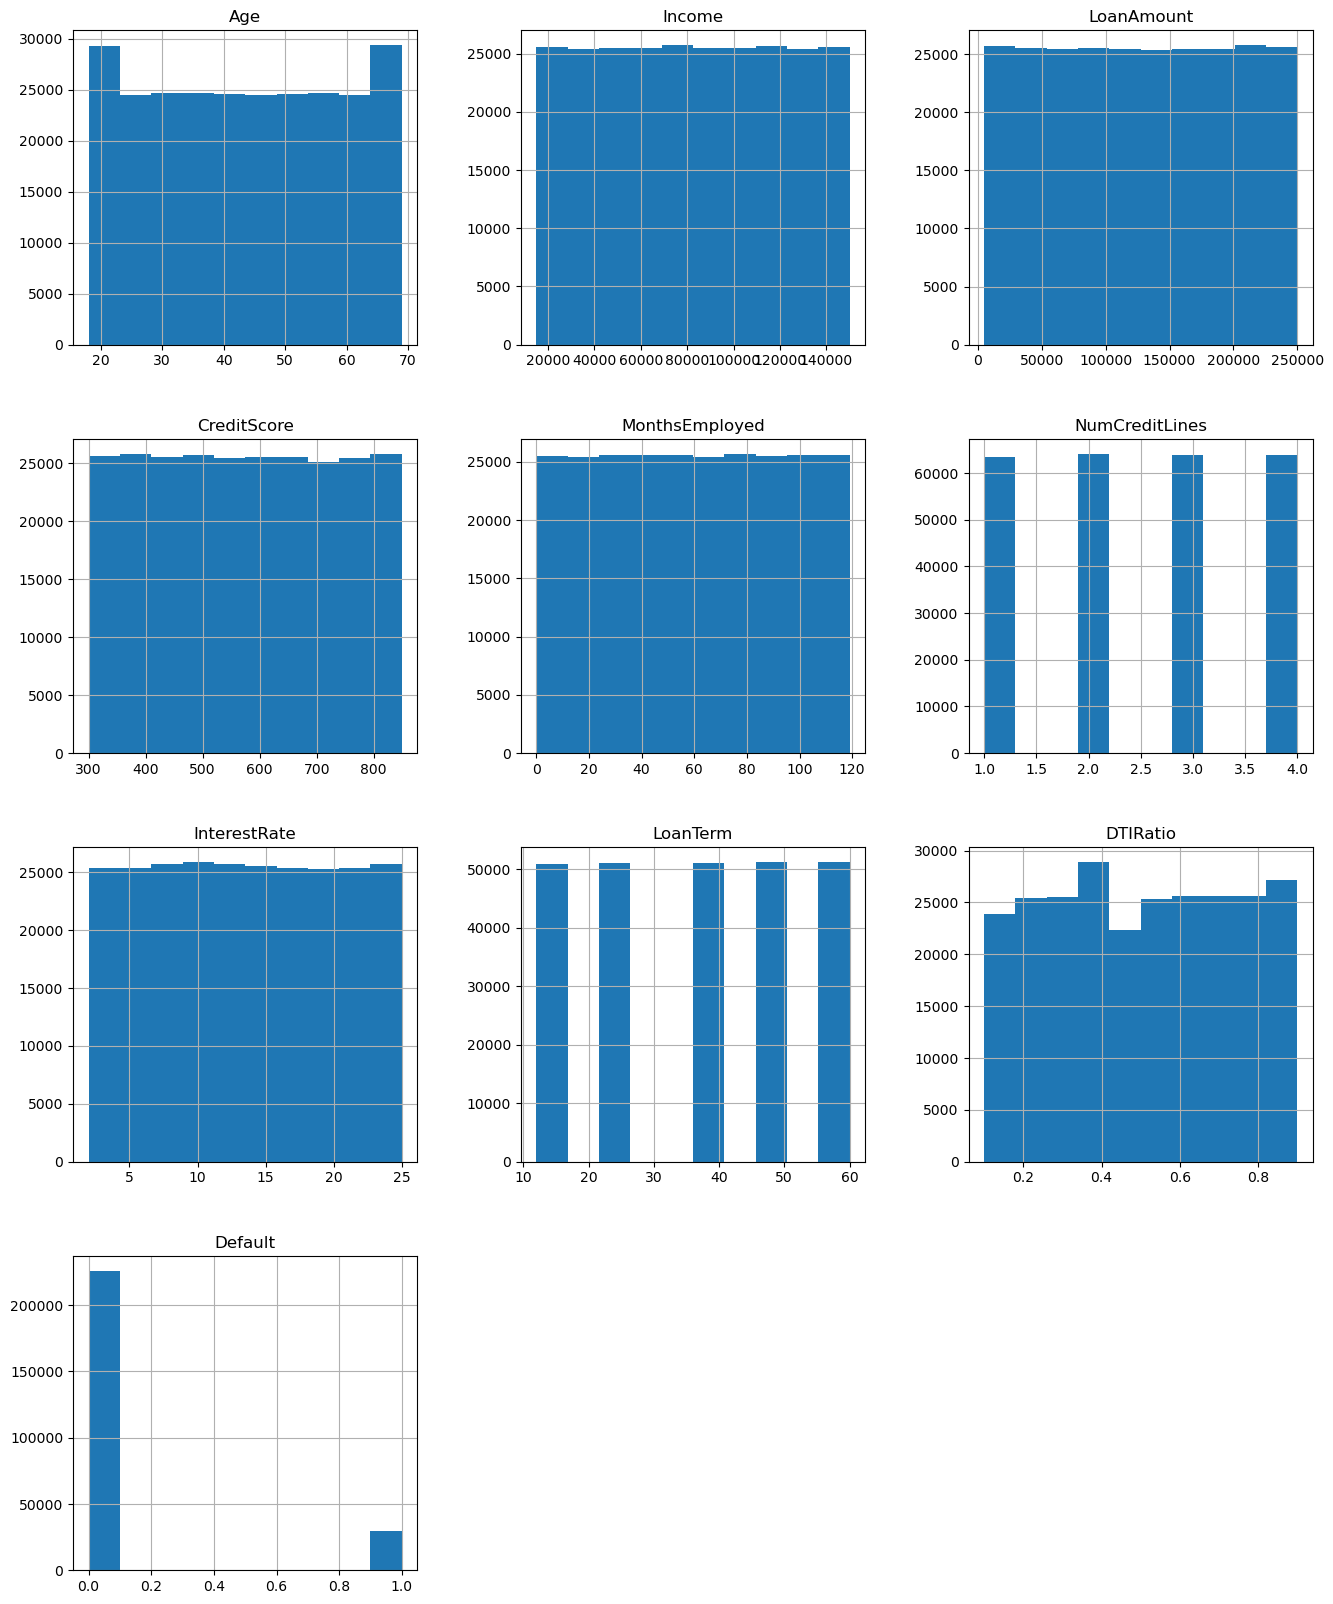

In [15]:
# Checking the data distribution of all the numerical columns;
loan_data.hist(figsize=(16, 20))
plt.show()

<Figure size 1400x1000 with 0 Axes>

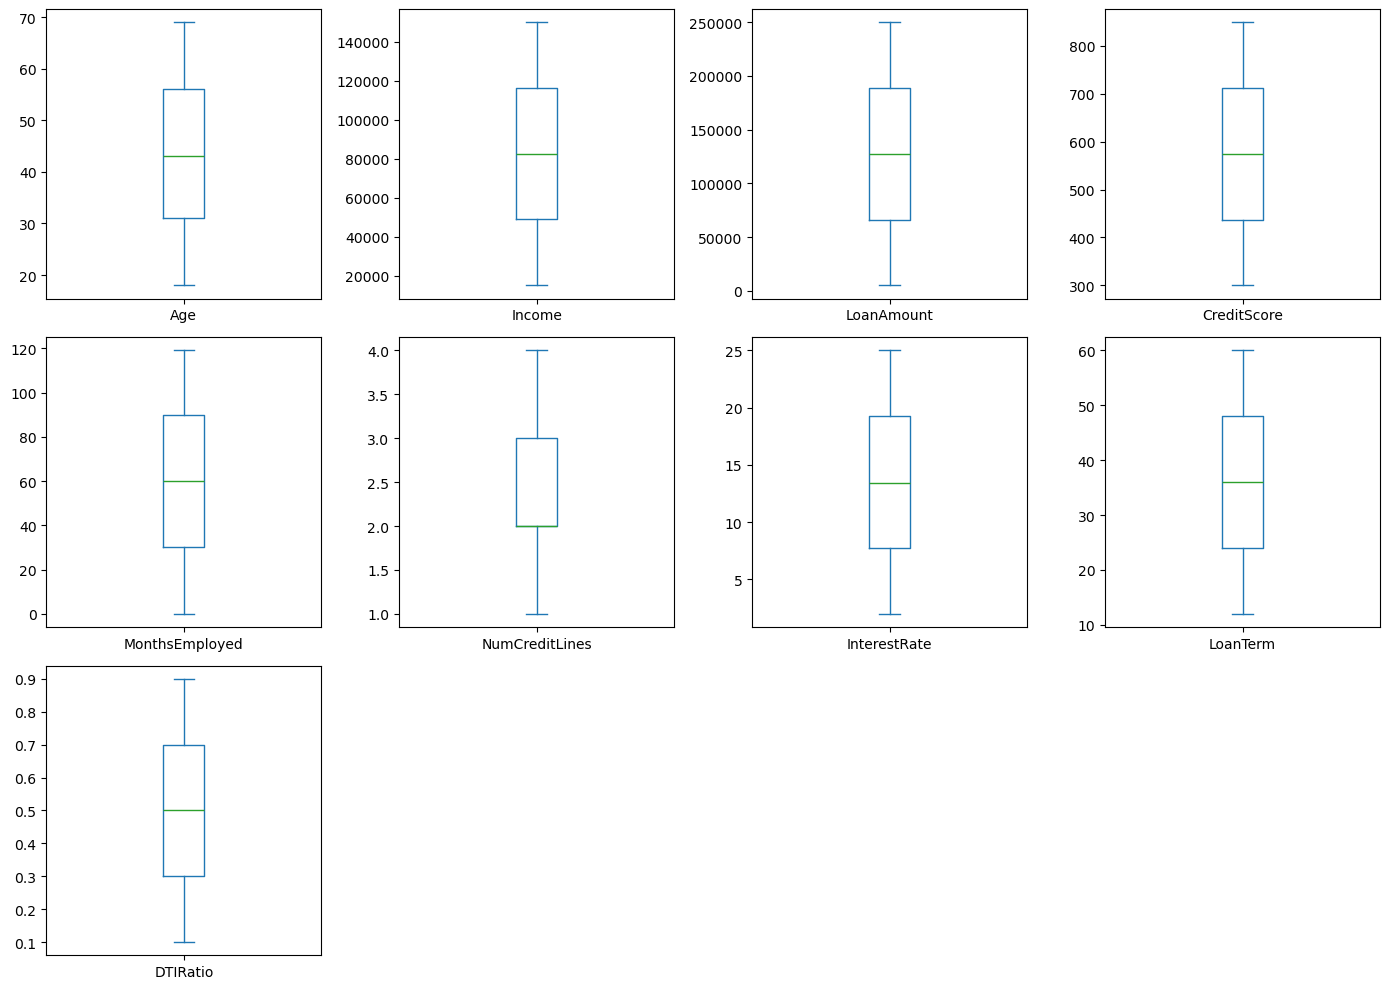

In [16]:
# Checking for OUtliers
#numerical_columns = loan_data.select_dtypes(include=['int64', 'float64'])
numerical_columns = loan_data._get_numeric_data()

#Plotting the boxplot for the outliers:
plt.figure(figsize=(14, 10))
numerical_columns.drop('Default', axis=1).plot(kind='box', subplots=True, layout=(3, 4), figsize=(14, 10), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

The boxplot result above showed that there is no outlier in all the numerical columns.

In [17]:
# Checking for correlation between the numerical columns:
correlation_matrix = numerical_columns.corr()

print(correlation_matrix)

                     Age    Income  LoanAmount  CreditScore  MonthsEmployed  \
Age             1.000000 -0.001244   -0.002213    -0.000548       -0.000341   
Income         -0.001244  1.000000   -0.000865    -0.001430        0.002675   
LoanAmount     -0.002213 -0.000865    1.000000     0.001261        0.002817   
CreditScore    -0.000548 -0.001430    0.001261     1.000000        0.000613   
MonthsEmployed -0.000341  0.002675    0.002817     0.000613        1.000000   
NumCreditLines -0.000890 -0.002016    0.000794     0.000016        0.001267   
InterestRate   -0.001127 -0.002303   -0.002291     0.000436        0.000096   
LoanTerm        0.000263 -0.000998    0.002538     0.001130       -0.001166   
DTIRatio       -0.004689  0.000205    0.001122    -0.001039        0.001765   
Default        -0.167783 -0.099119    0.086659    -0.034166       -0.097374   

                NumCreditLines  InterestRate  LoanTerm  DTIRatio   Default  
Age                  -0.000890     -0.001127  0.00026

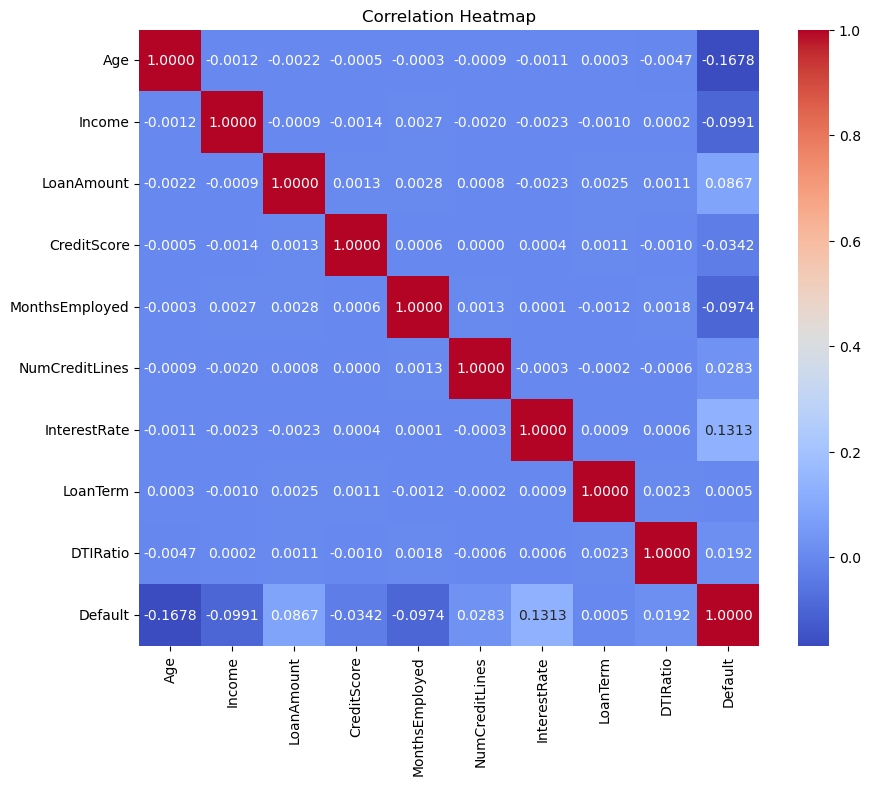

In [18]:
#Plotting the Correlation Matrix Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".4f")
plt.title('Correlation Heatmap')
plt.show()

### Correlation Matrix Overview:
1. **Age and Default:** There is a negative correlation (-0.17) between age and default. This result suggests that older individuals may be less likely to default on paying back their loan compared to younger individuals.
2. **Income and Default:** There is a negative correlation (-0.10) between income and default. This result also suggest  that higher income individuals may be less likely to default on paying back their loan.
3. **LoanAmount and Default:** There is a positive correlation (0.09) between loan amount and default. This result highlights that person(s) with larger loan amounts may be more likely to default.
4. **MonthsEmployed and Default:** There is a negative correlation (-0.10) between the number of months employed and default. This result also highlights that person(s) who have been employed for a longer period may be less likely to default.
5. **InterestRate and Default:** There is a positive correlation (0.13) between interest rate and default. The result shows that person(s) with loans that has higher interest rates are more likely to default.
6. **Other Correlations:** The result of other pairs of variables such as credit score and default, DTI ratio and default, loan term and default etc shows weak or non-existence correlation. Though, they may provide additional insights but are not as strong as the previous 5 mentioned above.

In [19]:
from scipy.stats import pearsonr

X = numerical_columns.values
y = loan_data['Default']

# Getting column names
column_names = numerical_columns.columns

# Calculating correlation coefficients and p-values
correlation_coefs = []
p_values = []

for i in range(X.shape[1]):
    corr_coef, p_value = pearsonr(X[:, i], y)
    correlation_coefs.append(corr_coef)
    p_values.append(p_value)

# Defining significance level
alpha = 0.05

# Interpreting the results
for i in range(len(correlation_coefs)):
    if p_values[i] < alpha:
        print(f"Variable '{column_names[i]}': Correlation coefficient = {correlation_coefs[i]}, p-value = {p_values[i]} (statistically significant)")
    else:
        print(f"Variable '{column_names[i]}': Correlation coefficient = {correlation_coefs[i]}, p-value = {p_values[i]} (not statistically significant)")


Variable 'Age': Correlation coefficient = -0.16778316487134323, p-value = 0.0 (statistically significant)
Variable 'Income': Correlation coefficient = -0.09911948445660468, p-value = 0.0 (statistically significant)
Variable 'LoanAmount': Correlation coefficient = 0.08665917723783709, p-value = 0.0 (statistically significant)
Variable 'CreditScore': Correlation coefficient = -0.03416649376077089, p-value = 7.92442171110111e-67 (statistically significant)
Variable 'MonthsEmployed': Correlation coefficient = -0.09737382897016986, p-value = 0.0 (statistically significant)
Variable 'NumCreditLines': Correlation coefficient = 0.028329721809228672, p-value = 1.6808561555377811e-46 (statistically significant)
Variable 'InterestRate': Correlation coefficient = 0.1312730152798975, p-value = 0.0 (statistically significant)
Variable 'LoanTerm': Correlation coefficient = 0.0005446976963166564, p-value = 0.7831283154536466 (not statistically significant)
Variable 'DTIRatio': Correlation coefficient 

### Visualizing the categorical variables:

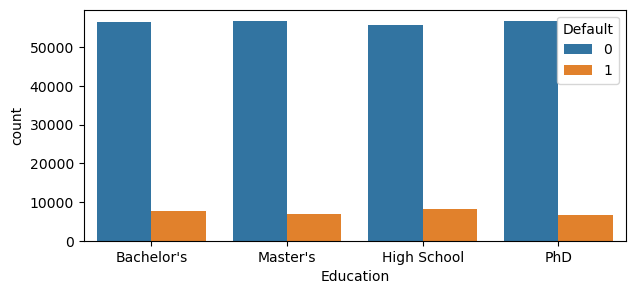

In [20]:
# For the education column:
plt.figure(figsize=(7, 3))
sns.countplot(data=loan_data, x='Education', hue='Default')
plt.show()

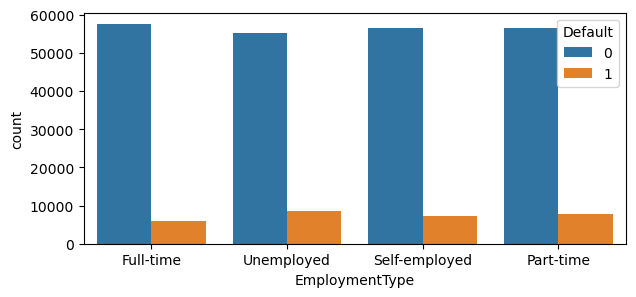

In [21]:
# For the employment type column:
plt.figure(figsize=(7, 3))
sns.countplot(data=loan_data, x='EmploymentType', hue='Default')
plt.show()

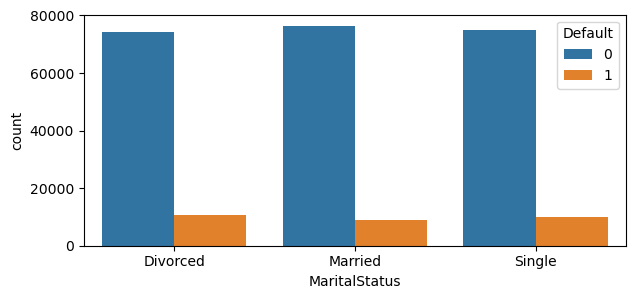

In [22]:
# For the marital status column:
plt.figure(figsize=(7, 3))
sns.countplot(data=loan_data, x='MaritalStatus', hue='Default')
plt.show()

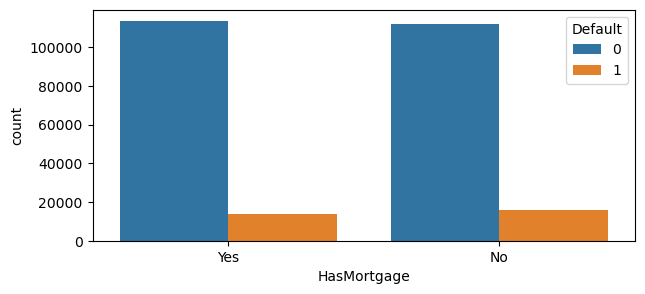

In [23]:
# For the has mortgage column:
plt.figure(figsize=(7, 3))
sns.countplot(data=loan_data, x='HasMortgage', hue='Default')
plt.show()

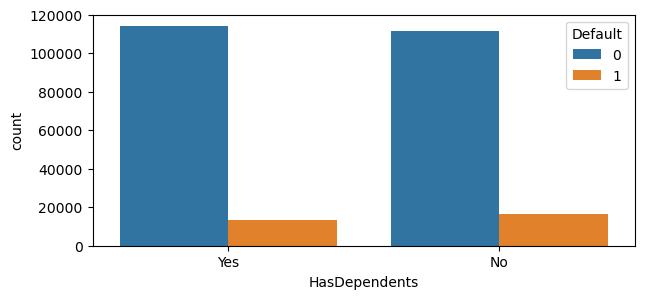

In [24]:
# For the has dependents column:
plt.figure(figsize=(7, 3))
sns.countplot(data=loan_data, x='HasDependents', hue='Default')
plt.show()

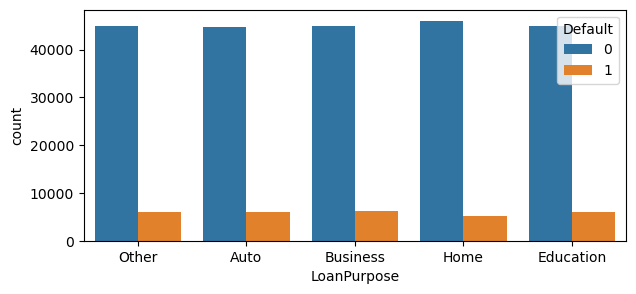

In [25]:
# For the loan purpose column:
plt.figure(figsize=(7, 3))
sns.countplot(data=loan_data, x='LoanPurpose', hue='Default')
plt.show()

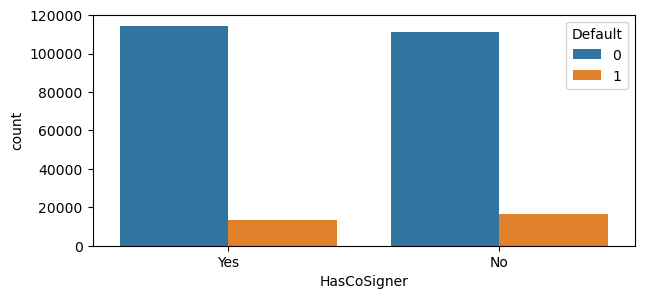

In [26]:
# For the has cosigner column:
plt.figure(figsize=(7, 3))
sns.countplot(data=loan_data, x='HasCoSigner', hue='Default')
plt.show()

### Step 3. Data Preprocessing:

### Encoding the Categorial Variables

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [28]:
categorical_cols = loan_data.select_dtypes(include='object')
categorical_cols.head(5)

,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes
1,Master's,Full-time,Married,No,No,Other,Yes
2,Master's,Unemployed,Divorced,Yes,Yes,Auto,No
3,High School,Full-time,Married,No,No,Business,No
4,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No


In [29]:
cols_to_encode = categorical_cols

for i in cols_to_encode:
    loan_data[i] = le.fit_transform(loan_data[i].astype(str))

In [30]:
loan_data.head(5)

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,0,0,0,1,1,4,1,0
1,69,50432,124440,458,15,1,4.81,60,0.68,2,0,1,0,0,4,1,0
2,46,84208,129188,451,26,3,21.17,24,0.31,2,3,0,1,1,0,0,1
3,32,31713,44799,743,0,3,7.07,24,0.23,1,0,1,0,0,1,0,0
4,60,20437,9139,633,8,4,6.51,48,0.73,0,3,0,0,1,0,0,0


### Feature Selection

Feature Bachelor's: 14.951165643168043
Feature High School: 99.79512530748741
Feature Master's: 34.000519772450225
Feature PhD: 65.27217183282153
Feature Full-time: 286.53037634815223
Feature Part-time: 7.7622076392449495
Feature Self-employed: 1.4113477640193972
Feature Unemployed: 234.0409966641861
Feature Divorced: 70.11241793931728
Feature Married: 122.81392978662701
Feature Single: 7.4347878806045875
Feature NoMortgage: 66.69915332088995
Feature YesMortgage: 66.6954964831412
Feature NoDependent: 153.61590010416927
Feature HasDependent: 153.4511510137039
Feature Auto: 3.574189142899067
Feature Business: 25.420604376448697
Feature Education: 2.520802569993371
Feature Home: 94.88767974544567
Feature Other: 1.530948922090167
Feature NoCosigner: 195.3166349091519
Feature HasCosigner: 195.23251328974442
Feature Education: 111.53031386916382
Feature EmploymentType: 357.41599446017455
Feature MaritalStatus: 10.619979967653217
Feature HasMortgage: 66.6954964831412
Feature HasDependents: 15

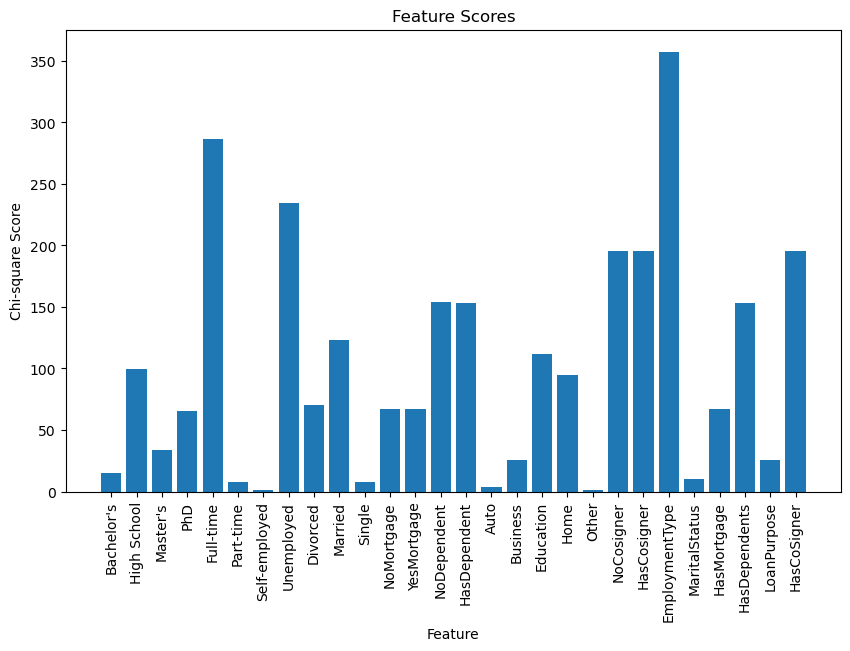

In [31]:
# making a copy of the loan data into x_cat_var
x_cat_var = df.copy()
x_cat_var.drop('LoanID', axis=1, inplace=True)

# Selecting all columns who are of object datatypes and getting the target variable out
x_cat = x_cat_var.select_dtypes(include='object')
y_cat = x_cat_var['Default']

# Creating dummy variables so as to get all the elements in each variables out
x_cat_edu = pd.get_dummies(x_cat['Education'])
x_cat_emp = pd.get_dummies(x_cat['EmploymentType'])
x_cat_marstat = pd.get_dummies(x_cat['MaritalStatus'])
x_cat_mort = pd.get_dummies(x_cat['HasMortgage'])
x_cat_dep = pd.get_dummies(x_cat['HasDependents'])
x_cat_lp = pd.get_dummies(x_cat['LoanPurpose'])
x_cat_cosign = pd.get_dummies(x_cat['HasCoSigner'])

# Renaming some of the columns
x_cat_mort.rename(columns={'No':'NoMortgage', 'Yes':'YesMortgage'}, inplace=True)
x_cat_dep.rename(columns={'No':'NoDependent', 'Yes':'HasDependent'}, inplace=True)
x_cat_cosign.rename(columns={'No':'NoCosigner', 'Yes':'HasCosigner'}, inplace=True)

# Encoding the categorical variables therein
for col in x_cat.columns:
    # Apply label encoding to each column
    x_cat[col] = le.fit_transform(x_cat[col])

# Combining the dummy variables to the categorical variables
x_cat_dum = pd.concat([x_cat_edu,x_cat_emp,x_cat_marstat,x_cat_mort,x_cat_dep,x_cat_lp, x_cat_cosign, x_cat], axis=1)

# Checking the impact of each element on the target variable using chi
from sklearn.feature_selection import SelectKBest #Kbest is used to select the best features
from sklearn.feature_selection import chi2 #Chi2 is used for scoring 

fs = SelectKBest(score_func=chi2, k='all')
fs.fit(x_cat_dum, y_cat)

# Print scores with column names
feature_scores = list(zip(x_cat_dum.columns, fs.scores_))
for feature, score in feature_scores:
    print('Feature {}: {}'.format(feature, score))

# Plot the scores
plt.figure(figsize=(10, 6))
plt.bar(x_cat_dum.columns, fs.scores_)
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Chi-square Score')
plt.title('Feature Scores')
plt.show()

In [32]:
# Separating the Dependent Variable(y) from Independent Variables(x)
x = loan_data.drop("Default", axis=1)
y = loan_data["Default"]

In [33]:
x.tail()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
255342,19,37979,210682,541,109,4,14.11,12,0.85,0,0,1,0,0,4,0
255343,32,51953,189899,511,14,2,11.55,24,0.21,1,1,0,0,0,3,0
255344,56,84820,208294,597,70,3,5.29,60,0.50,1,2,1,1,1,0,1
255345,42,85109,60575,809,40,1,20.90,48,0.44,1,1,2,1,1,4,0
255346,62,22418,18481,636,113,2,6.73,12,0.48,0,3,0,1,0,2,1


In [34]:
y.head()

0    0
1    0
2    1
3    0
4    0
Name: Default, dtype: int64

In [35]:
x.shape

(255347, 16)

In [36]:
y.shape

(255347,)

### 1. Univariate Feature Selection

In [37]:
from sklearn.feature_selection import SelectKBest #Kbest is used to select the best features
from sklearn.feature_selection import chi2 #Chi2 is used for scoring 

# Using Kbest to select the top 12 best features
best_features = SelectKBest(score_func=chi2, k='all')
fit = best_features.fit(x, y)
scores = pd.DataFrame(fit.scores_, columns=["Score"])
features = pd.DataFrame(x.columns, columns=["Feature Name"])

# Combining feature names and their scores into a DataFrame
feature_scores = pd.concat([features, scores], axis=1)

# Sorting features by score in descending order
top_features = feature_scores.sort_values(by="Score", ascending=False)

# Printing the top features with their scores
print(top_features)

      Feature Name         Score
2       LoanAmount  7.543019e+07
1           Income  4.616384e+07
4   MonthsEmployed  4.880122e+04
0              Age  3.713400e+04
6     InterestRate  1.436314e+04
3      CreditScore  1.310651e+04
10  EmploymentType  3.574160e+02
15     HasCoSigner  1.952325e+02
13   HasDependents  1.534512e+02
9        Education  1.115303e+02
5   NumCreditLines  1.022384e+02
12     HasMortgage  6.669550e+01
14     LoanPurpose  2.596833e+01
11   MaritalStatus  1.061998e+01
8         DTIRatio  1.007196e+01
7         LoanTerm  6.055566e-01


### 2. Feature Importance

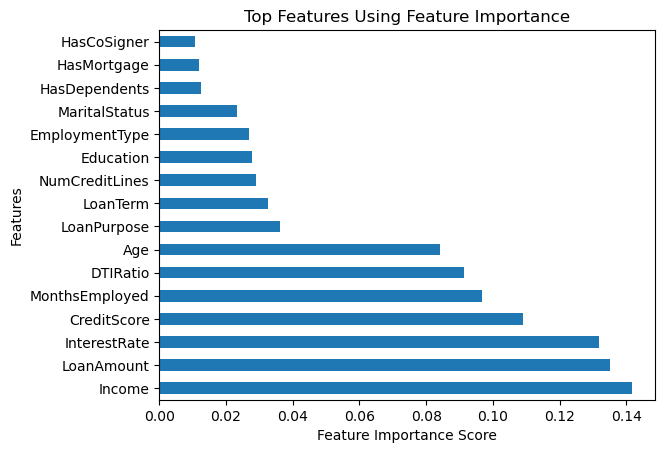

In [38]:
#Importing DecisionTreeClassifier and Training it to do Feature Importance
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(x,y)


#Getting the Feature Importance Result
feat_imp_result = pd.Series(classifier.feature_importances_, index=x.columns)


#PLotting the top 12 result
feat_imp_result.nlargest(18).plot(kind="barh")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Top Features Using Feature Importance")
plt.show()

### Data Normalization/Scaling

In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler

MinMaxScaler()

In [40]:
# Scaling the dataset:
cols_to_scale = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']


x[cols_to_scale] = scaler.fit_transform(x[cols_to_scale])  # Scaling the column

# Now x contains scaled values for all columns
x.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,0.745098,0.525885,0.186070,0.400729,0.672269,1.000000,0.575217,0.50,0.4250,0,0,0,1,1,4,1
1,1.000000,0.262461,0.487512,0.287796,0.126050,0.000000,0.122174,1.00,0.7250,2,0,1,0,0,4,1
2,0.549020,0.512656,0.506892,0.275046,0.218487,0.666667,0.833478,0.25,0.2625,2,3,0,1,1,0,0
3,0.274510,0.123801,0.162446,0.806922,0.000000,0.666667,0.220435,0.25,0.1625,1,0,1,0,0,1,0
4,0.823529,0.040274,0.016894,0.606557,0.067227,1.000000,0.196087,0.75,0.7875,0,3,0,0,1,0,0


In [41]:
x.shape

(255347, 16)

### Splitting the data set to Train and Test

In [42]:
from sklearn.model_selection import train_test_split
X_train_unb, X_test_unb, y_train_unb, y_test_unb = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [43]:
y_train_unb.value_counts()

Default
0    180555
1     23722
Name: count, dtype: int64

In [44]:
print("Proportion of Minority Class in train set: " + str(round(y_train_unb.sum()/len(y_train_unb) * 100, 2)) + "%")
print("Proportion of Minority Class in test set: " + str(round(y_test_unb.sum()/len(y_test_unb) * 100, 2)) + "%")

Proportion of Minority Class in train set: 11.61%
Proportion of Minority Class in test set: 11.61%


### Balancing the Dataset on the Train Data Using Hybrid Type:

In [45]:
import imblearn

In [46]:
# Balancing Data Using RandomOverSampler and RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy=0.8, random_state=42)
X_rand, Y_rand = ros.fit_resample(X_train_unb, y_train_unb)

plot = Y_rand.value_counts().plot.pie(autopct="%.2f%%")
plot_title = plot.set_title("Over-Sampling")

In [47]:
Y_rand.value_counts()

Default
0    180555
1    144444
Name: count, dtype: int64

In [48]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)

X_hybrid, Y_hybrid = rus.fit_resample(X_rand, Y_rand)

plot = Y_hybrid.value_counts().plot.pie(autopct="%.2f%%")
plot_title = plot.set_title("Under-Sampling")

In [49]:
Y_hybrid.value_counts()

Default
0    144444
1    144444
Name: count, dtype: int64

In [50]:
X_hybrid.shape

(288888, 16)

### Step 4. Modelling:

In [51]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn import metrics

In [53]:
#Creating ROC Function for ROC Curve and ROC_AUC_Score
def plot_roc(y_test, probs):
    fpr, tpr, threshold = metrics.roc_curve(y_test, probs)
    roc_auc = metrics.auc(fpr, tpr)
    print('ROC AUC = %0.2f'%roc_auc)
    plt.plot(fpr,tpr,label='AUC=%0.2f'%roc_auc, color='blue')
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guessing')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    
    plt.show()

### Random Forest Classifier

In [62]:
classifier = RandomForestClassifier()

# Training the model
classifier.fit(X_hybrid, Y_hybrid)

# Predicting the model
y_pred = classifier.predict(X_test_unb)

# The result of the model
print("Accuracy of Random Forest Classifier using HYBRID is:", round(metrics.accuracy_score(y_pred, y_test_unb) *100,2), "%")
print("Precision of Random Forest Classifier using HYBRID is:", round(metrics.precision_score(y_pred, y_test_unb) *100,2), "%")
print("Recall_score of RFC using HYBRID is:", round(metrics.recall_score(y_pred, y_test_unb) *100,2), "%")
print("F1_score of RFC using HYBRID is:", round(metrics.f1_score(y_pred, y_test_unb) *100,2), "%")

Accuracy of Random Forest Classifier using HYBRID is: 88.19 %
Precision of Random Forest Classifier using HYBRID is: 13.18 %
Recall_score of RFC using HYBRID is: 47.02 %
F1_score of RFC using HYBRID is: 20.6 %


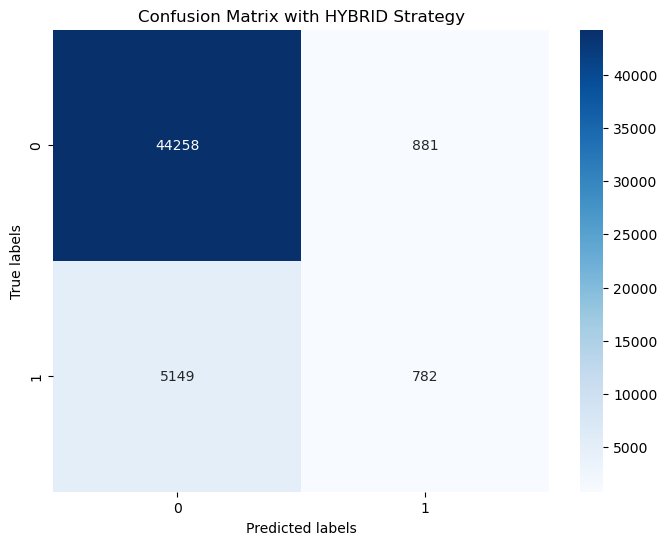

In [63]:
# Generating confusion matrix
conf_matrix = metrics.confusion_matrix(y_test_unb, y_pred)

# Plotting confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix with HYBRID Strategy')
plt.show()

### Decision Tree Classifier

In [64]:
dt_classifier = DecisionTreeClassifier()

# Training the model
dt_classifier.fit(X_hybrid, Y_hybrid)

# Predicting the model
y_pred1 = dt_classifier.predict(X_test_unb)

# The result of the model
print("Accuracy of Decision Tree Classifier Using HYBRID is:", round(metrics.accuracy_score(y_pred1, y_test_unb) *100,2), "%")
print("Precision of DTC using HYBRID is:", round(metrics.precision_score(y_pred1, y_test_unb) *100,2), "%")
print("Recall_score of DTC using HYBRID is:", round(metrics.recall_score(y_pred1, y_test_unb) *100,2), "%")
print("F1_score of DTC using HYBRID is:", round(metrics.f1_score(y_pred1, y_test_unb) *100,2), "%")

Accuracy of Decision Tree Classifier Using HYBRID is: 79.85 %
Precision of DTC using HYBRID is: 23.47 %
Recall_score of DTC using HYBRID is: 19.49 %
F1_score of DTC using HYBRID is: 21.3 %


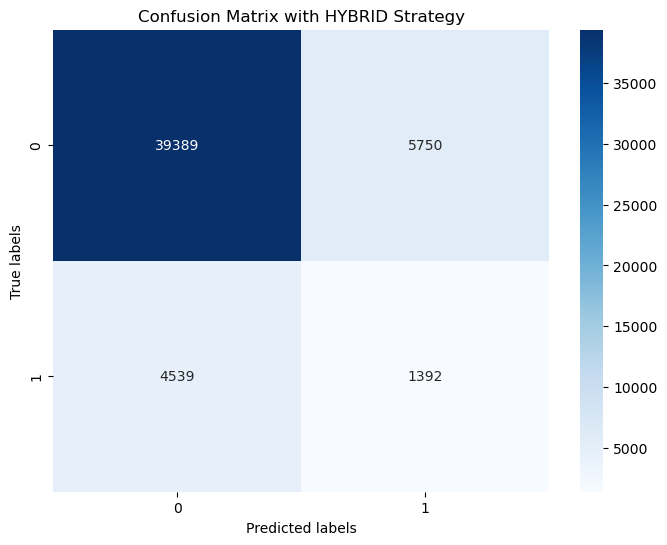

In [65]:
# Generating confusion matrix
conf_matrix = metrics.confusion_matrix(y_test_unb, y_pred1)

# Plotting confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix with HYBRID Strategy')
plt.show()

### Naive-Bayes Classifier

In [66]:
nb_classifier = GaussianNB()

# Training the model
nb_classifier.fit(X_hybrid, Y_hybrid)

# Ppredicting the model
y_pred2 = nb_classifier.predict(X_test_unb)
y_probs1 = nb_classifier.predict_proba(X_test_unb) [:, 1]

# The result of the model
print("Accuracy of Naive-Bayes Classifier Using HYBRID is:", round(metrics.accuracy_score(y_pred2, y_test_unb) *100,2), "%")
print("Precision of Naive-Bayes Classifier Using HYBRID is:", round(metrics.precision_score(y_pred2, y_test_unb) *100,2), "%")
print("Recall_score of Naive-Bayes Classifier Using HYBRID is:", round(metrics.recall_score(y_pred2, y_test_unb) *100,2), "%")
print("F1_score of Naive-Bayes Classifier Using HYBRID is:", round(metrics.f1_score(y_pred2, y_test_unb) *100, 2), "%")

Accuracy of Naive-Bayes Classifier Using HYBRID is: 66.97 %
Precision of Naive-Bayes Classifier Using HYBRID is: 70.88 %
Recall_score of Naive-Bayes Classifier Using HYBRID is: 21.73 %
F1_score of Naive-Bayes Classifier Using HYBRID is: 33.26 %


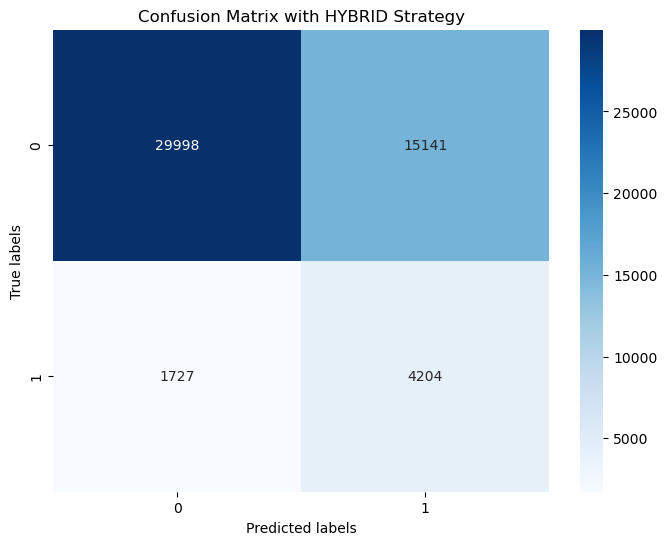

In [67]:
# Generating confusion matrix
conf_matrix = metrics.confusion_matrix(y_test_unb, y_pred2)

# Plotting confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix with HYBRID Strategy')
plt.show()

ROC AUC = 0.75


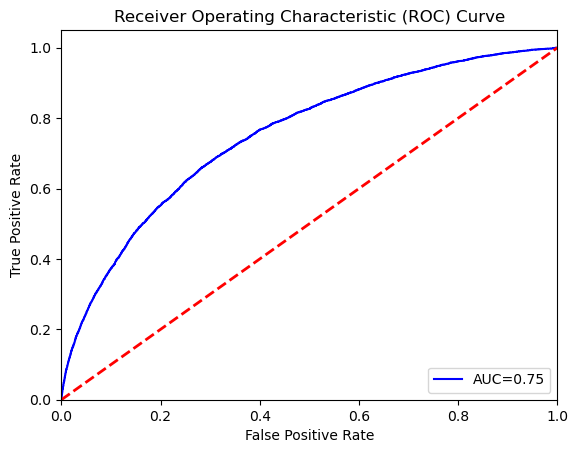

In [68]:
plot_roc(y_test_unb, y_probs1)

In [72]:
# Using Hybrid Dataset with Adjusted Threshold

nb_classifier = GaussianNB()

# Training the model
nb_classifier.fit(X_hybrid, Y_hybrid)

# Predicting the model
y_pred21 = (nb_classifier.predict_proba(X_test_unb)[:,1]>=0.45).astype(int)
y_probs2 = nb_classifier.predict_proba(X_test_unb) [:, 1]

# The result of the model
print("Accuracy of Naive-Bayes Classifier Using HYBRID is:", round(metrics.accuracy_score(y_test_unb, y_pred21) *100,2), "%")
print("Precision of Naive-Bayes Classifier Using HYBRID is:", round(metrics.precision_score(y_test_unb, y_pred21) *100,2), "%")
print("Recall_score of Naive-Bayes Classifier Using HYBRID is:", round(metrics.recall_score(y_test_unb, y_pred21) *100,2), "%")
print("F1_score of Naive-Bayes Classifier Using HYBRID is:", round(metrics.f1_score(y_test_unb, y_pred21) *100, 2), "%")
print("\n")

Accuracy of Naive-Bayes Classifier Using HYBRID is: 60.52 %
Precision of Naive-Bayes Classifier Using HYBRID is: 19.66 %
Recall_score of Naive-Bayes Classifier Using HYBRID is: 77.71 %
F1_score of Naive-Bayes Classifier Using HYBRID is: 31.38 %




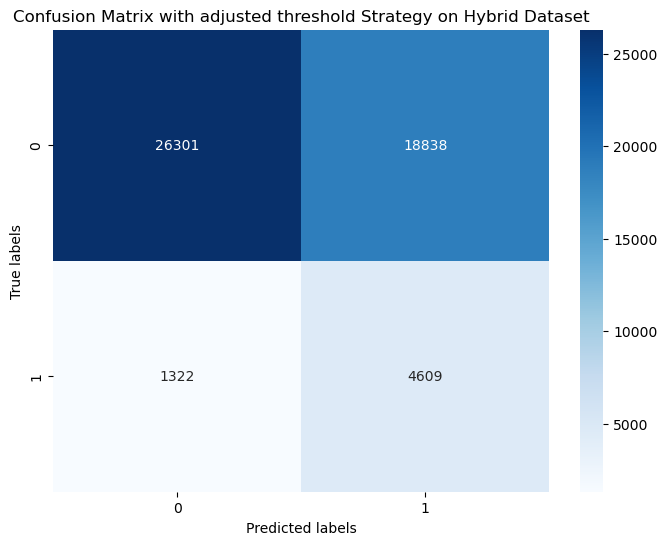

In [73]:
conf_matrix = metrics.confusion_matrix(y_test_unb, y_pred21)


# Plotting confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix with adjusted threshold Strategy on Hybrid Dataset')
plt.show()

ROC AUC = 0.75


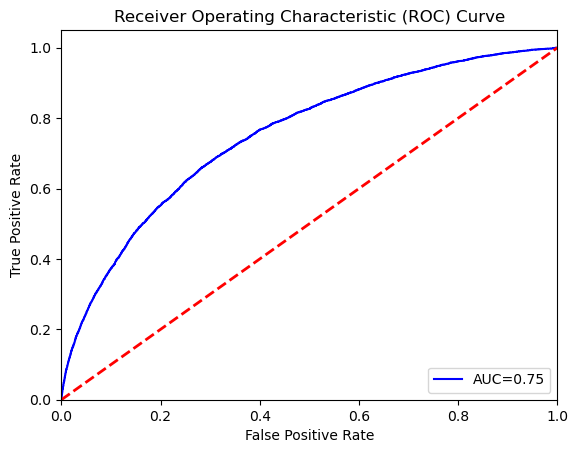

In [74]:
plot_roc(y_test_unb, y_probs2)

### K Nearest Neighbor

In [75]:
kn_classifier = KNeighborsClassifier()

# Training the model
kn_classifier.fit(X_hybrid, Y_hybrid)

# Ppredicting the model
y_pred3 = kn_classifier.predict(X_test_unb)

# The result of the model
print("Accuracy of KNeighbors Classifier Using HYBRID is:", round(metrics.accuracy_score(y_pred3, y_test_unb) *100,2), "%")
print("Precision of KNeighbors Classifier Using HYBRID is:", round(metrics.precision_score(y_pred3, y_test_unb) *100,2), "%")
print("Recall_score of KNeighbors Classifier Using HYBRID is:", round(metrics.recall_score(y_pred3, y_test_unb) *100,2), "%")
print("F1_score of KNeighbors Classifier Using HYBRID is:", round(metrics.f1_score(y_pred3, y_test_unb) *100, 2), "%")

Accuracy of KNeighbors Classifier Using HYBRID is: 65.86 %
Precision of KNeighbors Classifier Using HYBRID is: 44.75 %
Recall_score of KNeighbors Classifier Using HYBRID is: 15.79 %
F1_score of KNeighbors Classifier Using HYBRID is: 23.34 %


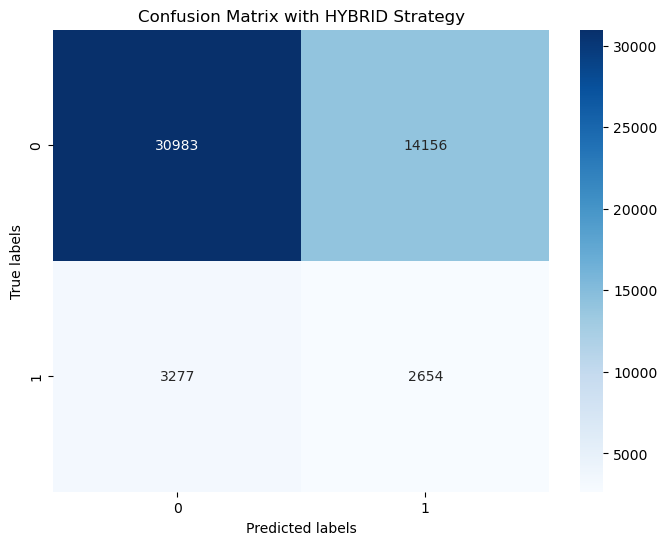

In [76]:
# Generating confusion matrix
conf_matrix = metrics.confusion_matrix(y_test_unb, y_pred3)

# Plotting confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix with HYBRID Strategy')
plt.show()

### Gradient Boosting Machine

In [82]:
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Training the model
gb_model.fit(X_hybrid, Y_hybrid)

# Predicting the model
y_pred4 = gb_model.predict(X_test_unb)
y_probs3 = gb_model.predict_proba(X_test_unb) [:, 1]

# The result of the model
print("Accuracy of GradientBoosting Classifier Using HYBRID is:", round(metrics.accuracy_score(y_pred4, y_test_unb) *100,2), "%")
print("Precision of GradientBoosting Classifier Using HYBRID is:", round(metrics.precision_score(y_pred4, y_test_unb) *100,2), "%")
print("Recall_score of GradientBoosting Classifier Using HYBRID is:", round(metrics.recall_score(y_pred4, y_test_unb) *100,2), "%")
print("F1_score of GradientBoosting Classifier Using HYBRID is:", round(metrics.f1_score(y_pred4, y_test_unb) *100, 2), "%")

Accuracy of GradientBoosting Classifier Using HYBRID is: 68.72 %
Precision of GradientBoosting Classifier Using HYBRID is: 69.38 %
Recall_score of GradientBoosting Classifier Using HYBRID is: 22.52 %
F1_score of GradientBoosting Classifier Using HYBRID is: 34.0 %


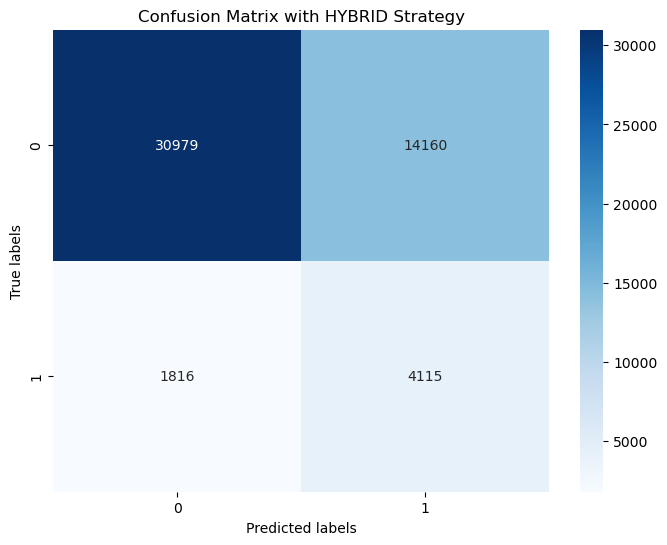

In [78]:
# Generating confusion matrix
conf_matrix = metrics.confusion_matrix(y_test_unb, y_pred4)

# Plotting confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix with HYBRID Strategy')
plt.show()

ROC AUC = 0.76


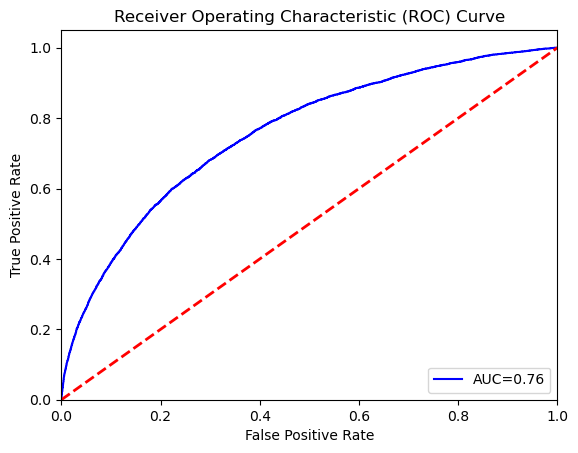

In [83]:
plot_roc(y_test_unb, y_probs3)

### XGBOOST Classifier

In [80]:
from xgboost import XGBClassifier

# Instantiating the XGBoost classifier
xgb_model = XGBClassifier(random_state=42)

# Train the model on the resampled training data
xgb_model.fit(X_hybrid, Y_hybrid)

# Make predictions on the testing data
y_pred_xgb3 = xgb_model.predict(X_test_unb)

# Evaluate the model
print("Extreme Gradient Boosting (XGBoost) Classifier:")
print("Accuracy:", round(metrics.accuracy_score(y_pred_xgb3, y_test_unb) *100,2), "%")
print("Precision:", round(metrics.precision_score(y_pred_xgb3, y_test_unb) *100,2), "%")
print("Recall:", round(metrics.recall_score(y_pred_xgb3, y_test_unb) *100,2), "%")
print("F1 Score:", round(metrics.f1_score(y_pred_xgb3, y_test_unb) *100,2), "%")

Extreme Gradient Boosting (XGBoost) Classifier:
Accuracy: 71.78 %
Precision: 62.57 %
Recall: 23.33 %
F1 Score: 33.99 %


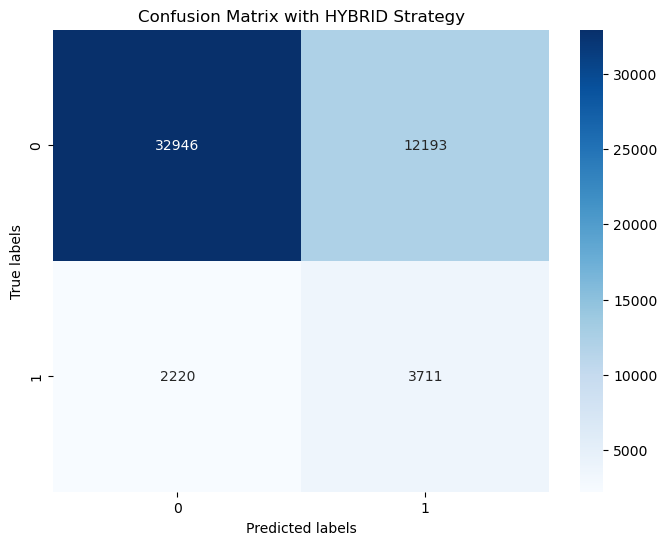

In [81]:
# Generating confusion matrix
conf_matrix = metrics.confusion_matrix(y_test_unb, y_pred_xgb3)

# Plotting confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix with HYBRID Strategy')
plt.show()

### Logistic Regression

In [86]:
lr_classifier = LogisticRegression()
lr_classifier.fit(X_hybrid, Y_hybrid)


#Making prediction:
y_pred6 = (lr_classifier.predict_proba(X_test_unb)[:,1]>=0.5).astype(int)
y_probs4 = lr_classifier.predict_proba(X_test_unb) [:, 1]

# Getting the metrics
print("Accuracy:", round(metrics.accuracy_score(y_pred6, y_test_unb) *100,2), "%")
print('Precision:', round(metrics.precision_score(y_pred6, y_test_unb) *100,2), "%")
print('Recall:', round(metrics.recall_score(y_pred6, y_test_unb) *100,2), "%")
print('F1_Score:', round(metrics.f1_score(y_pred6, y_test_unb) *100,2), "%")

Accuracy: 67.4 %
Precision: 70.21 %
Recall: 21.86 %
F1_Score: 33.34 %


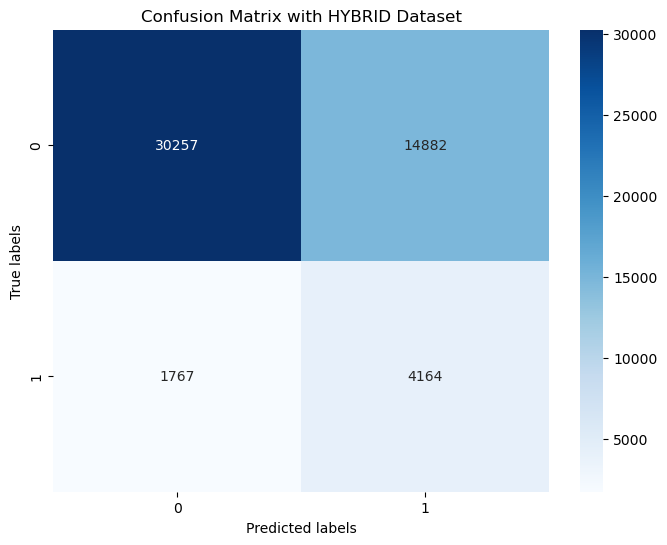

In [85]:
# Generating confusion matrix
conf_matrix = metrics.confusion_matrix(y_test_unb, y_pred6)

# Plotting confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix with HYBRID Dataset')
plt.show()

ROC AUC = 0.75


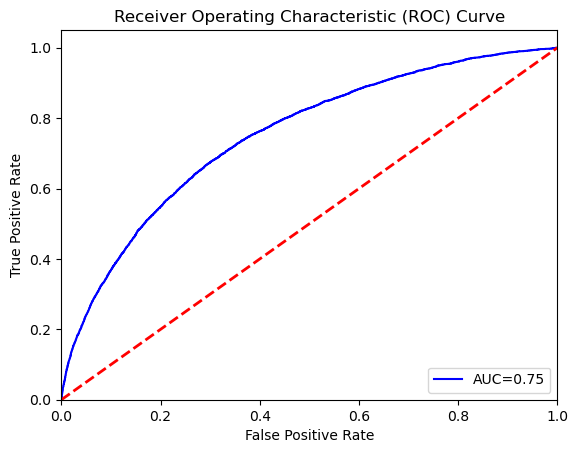

In [87]:
plot_roc(y_test_unb, y_probs4)

### ROC Curve for Various Models

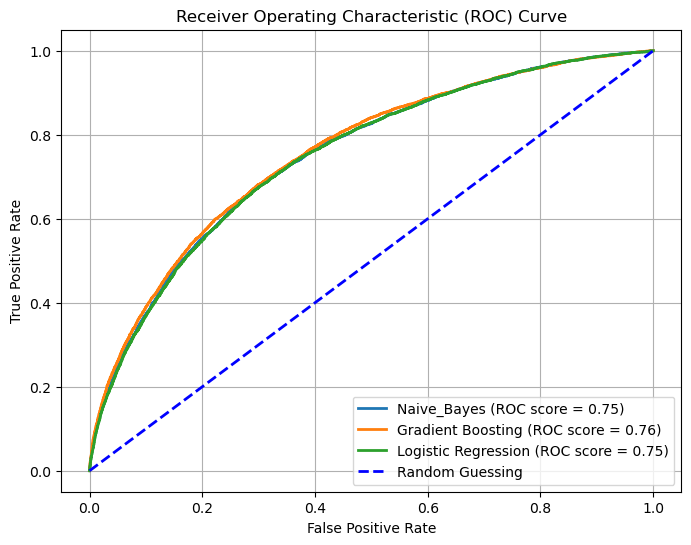

In [91]:
from sklearn.metrics import roc_curve, roc_auc_score

# List of predicted probabilities for each model
y_probs = [y_probs1, y_probs3, y_probs4]  

# List of model names (for plotting)
model_names = ['Naive_Bayes', 'Gradient Boosting', 'Logistic Regression']  

plt.figure(figsize=(8, 6))

for y_prob, name in zip(y_probs, model_names):
    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test_unb, y_prob)
    
    # Compute AUC
    auc = roc_auc_score(y_test_unb, y_prob)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, lw=2, label='%s (ROC score = %0.2f)' % (name, auc))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [90]:
# Model names
model_names = [
    "Random Forest Classifier",
    "Decision Tree Classifier",
    "Naive Bayes Classifier",
    "KNeighbors Classifier",
    "Gradient Boosting Classifier",
    "XGBoost Classifier",
    "Logistic Regression"
]

# Accuracy scores
accuracy_scores = [
    round(metrics.accuracy_score(y_pred, y_test_unb) * 100, 2),  # RFC
    round(metrics.accuracy_score(y_pred1, y_test_unb) * 100, 2),  # DTC
    round(metrics.accuracy_score(y_pred2, y_test_unb) * 100, 2),  # Naive Bayes
    round(metrics.accuracy_score(y_pred3, y_test_unb) * 100, 2),  # KNeighbors
    round(metrics.accuracy_score(y_pred4, y_test_unb) * 100, 2),  # Gradient Boosting
    round(metrics.accuracy_score(y_pred_xgb3, y_test_unb) * 100, 2),  # XGBoost
    round(metrics.accuracy_score(y_pred6, y_test_unb) * 100, 2)   # Logistic Regression
]

# Precision scores
precision_scores = [
    round(metrics.precision_score(y_pred, y_test_unb) * 100, 2),  # RFC
    round(metrics.precision_score(y_pred1, y_test_unb) * 100, 2),  # DTC
    round(metrics.precision_score(y_pred2, y_test_unb) * 100, 2),  # Naive Bayes
    round(metrics.precision_score(y_pred3, y_test_unb) * 100, 2),  # KNeighbors
    round(metrics.precision_score(y_pred4, y_test_unb) * 100, 2),  # Gradient Boosting
    round(metrics.precision_score(y_pred_xgb3, y_test_unb) * 100, 2),  # XGBoost
    round(metrics.precision_score(y_pred6, y_test_unb) * 100, 2)   # Logistic Regression
]

# Recall scores
recall_scores = [
    round(metrics.recall_score(y_pred, y_test_unb) * 100, 2),  # RFC
    round(metrics.recall_score(y_pred1, y_test_unb) * 100, 2),  # DTC
    round(metrics.recall_score(y_pred2, y_test_unb) * 100, 2),  # Naive Bayes
    round(metrics.recall_score(y_pred3, y_test_unb) * 100, 2),  # KNeighbors
    round(metrics.recall_score(y_pred4, y_test_unb) * 100, 2),  # Gradient Boosting
    round(metrics.recall_score(y_pred_xgb3, y_test_unb) * 100, 2),  # XGBoost
    round(metrics.recall_score(y_pred6, y_test_unb) * 100, 2)   # Logistic Regression
]

# F1 scores
f1_scores = [
    round(metrics.f1_score(y_pred, y_test_unb) * 100, 2),  # RFC
    round(metrics.f1_score(y_pred1, y_test_unb) * 100, 2),  # DTC
    round(metrics.f1_score(y_pred2, y_test_unb) * 100, 2),  # Naive Bayes
    round(metrics.f1_score(y_pred3, y_test_unb) * 100, 2),  # KNeighbors
    round(metrics.f1_score(y_pred4, y_test_unb) * 100, 2),  # Gradient Boosting
    round(metrics.f1_score(y_pred_xgb3, y_test_unb) * 100, 2),  # XGBoost
    round(metrics.f1_score(y_pred6, y_test_unb) * 100, 2)   # Logistic Regression
]

# Creating the DataFrame
results_df = pd.DataFrame({
    "Model": model_names,
    "Accuracy (%)": accuracy_scores,
    "Precision (%)": precision_scores,
    "Recall (%)": recall_scores,
    "F1 Score (%)": f1_scores
})

# Displaying the results DataFrame
results_df

,Model,Accuracy (%),Precision (%),Recall (%),F1 Score (%)
0,Random Forest Classifier,88.19,13.18,47.02,20.60
1,Decision Tree Classifier,79.85,23.47,19.49,21.30
2,Naive Bayes Classifier,66.97,70.88,21.73,33.26
3,KNeighbors Classifier,65.86,44.75,15.79,23.34
4,Gradient Boosting Classifier,68.72,69.38,22.52,34.00
5,XGBoost Classifier,71.78,62.57,23.33,33.99
6,Logistic Regression,67.40,70.21,21.86,33.34


Based on the Precision, Recall, F1 Score and ROC AUC score, the Gradient boosting Classifier Model perform best and will be saved as the best model.

### Step 5. Saving the best model:

In [92]:
import joblib

In [93]:
joblib.dump(gb_model, 'loanmodel.pkl')

['loanmodel.pkl']

In [94]:
joblib.dump(scaler, 'loanscaler.pkl')

['loanscaler.pkl']

In [95]:
loaded_model = joblib.load('loanmodel.pkl')
loaded_scaler = joblib.load('loanscaler.pkl')

In [96]:
loan_data.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,0,0,0,1,1,4,1,0
1,69,50432,124440,458,15,1,4.81,60,0.68,2,0,1,0,0,4,1,0
2,46,84208,129188,451,26,3,21.17,24,0.31,2,3,0,1,1,0,0,1
3,32,31713,44799,743,0,3,7.07,24,0.23,1,0,1,0,0,1,0,0
4,60,20437,9139,633,8,4,6.51,48,0.73,0,3,0,0,1,0,0,0


In [100]:
sample_loan_data = {"Age": 46,
                   "Income": 84208,
                    "LoanAmount": 129188,
                    "CreditScore": 451,
                    "MonthsEmployed": 26,
                    "NumCreditLines": 3,
                    "InterestRate": 21.17,
                    "LoanTerm": 24,
                    "DTIRatio": 0.31,
                    "Education": 2,
                    "EmploymentType": 3,
                    "MaritalStatus": 0,
                    "HasMortgage": 1,
                    "HasDependents": 1,
                    "LoanPurpose": 0,
                    "HasCoSigner": 0
                   }

In [104]:
def return_prediction(model, scaler, sample_json):
    # Extract and scale only the specified features
    age = sample_json["Age"]
    income = sample_json["Income"]
    loanamount = sample_json["LoanAmount"]
    creditscore = sample_json["CreditScore"]
    months_employed = sample_json["MonthsEmployed"]
    num_credit_lines = sample_json["NumCreditLines"]
    interest_rate = sample_json["InterestRate"]
    loan_term = sample_json["LoanTerm"]
    dti_ratio = sample_json["DTIRatio"]
    
    # Extract the non-scaled features
    education = sample_json["Education"]
    employment_type = sample_json["EmploymentType"]
    marital_status = sample_json["MaritalStatus"]
    has_mortgage = sample_json["HasMortgage"]
    has_dependents = sample_json["HasDependents"]
    loan_purpose = sample_json["LoanPurpose"]
    has_co_signer = sample_json["HasCoSigner"]
    
    # Prepare the input data for prediction, scaling the appropriate features
    loan_defaulter = [[age, income, loanamount, creditscore, months_employed, num_credit_lines, interest_rate,
                       loan_term, dti_ratio, education, employment_type, marital_status, has_mortgage, has_dependents,
                       loan_purpose, has_co_signer]]
    
    # Scale only the specified features, ensuring the input is 2D
    scaled_features = scaler.transform([loan_defaulter[0][:9]])  # Pass a 2D array to scaler
    
    # Combine scaled features with non-scaled features
    loan_defaulter = [scaled_features[0].tolist() + loan_defaulter[0][9:]]  # Removed tolist() from scaled_features[0]
    
    # Make the prediction
    class_ind = model.predict(loan_defaulter)
    
    # Return the predicted class
    return class_ind[0]  # Assuming you want to return the first prediction


In [105]:
return_prediction(loaded_model, loaded_scaler, sample_loan_data)

C:\Users\Owner\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Owner\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


1